In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886121201PNS003SRSPEC0004.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  9.354e-03 +/- 1.112e-03 (35.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-27
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.142e+04 sec
 Using fit statistic: chi
 Using Background File                P0886121201PNS003BGSPEC0004.FTZ
  Background Exposure Time: 2.142e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY7.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886121201PNS003SRCARF0004.FTZ



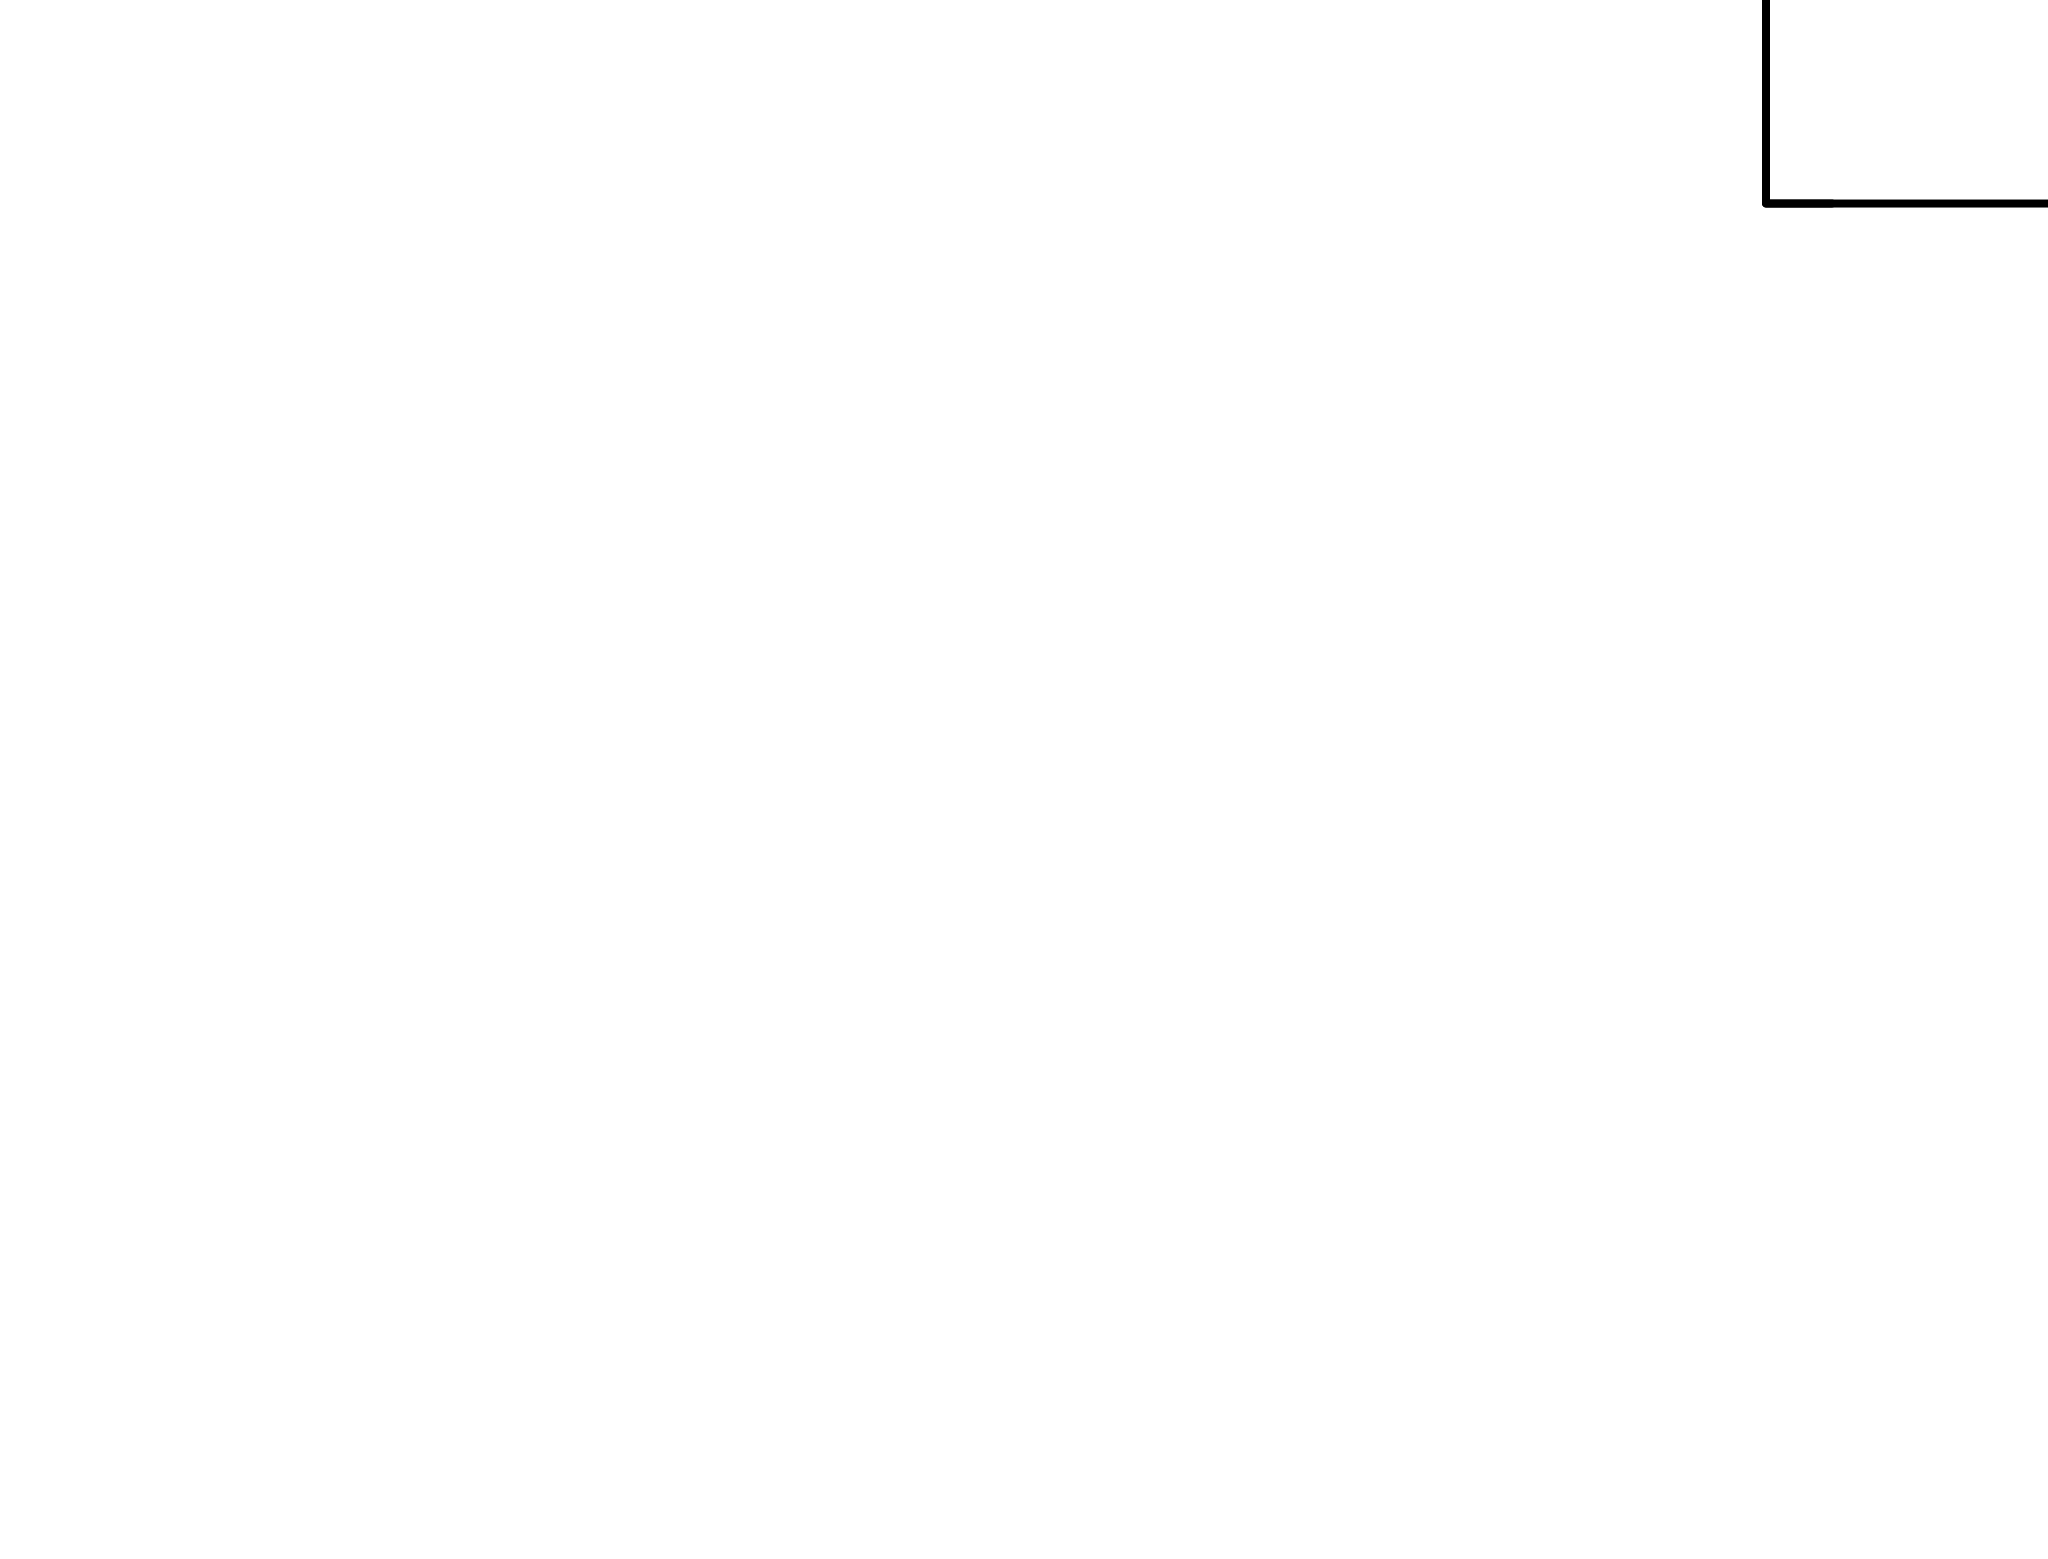

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (27) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

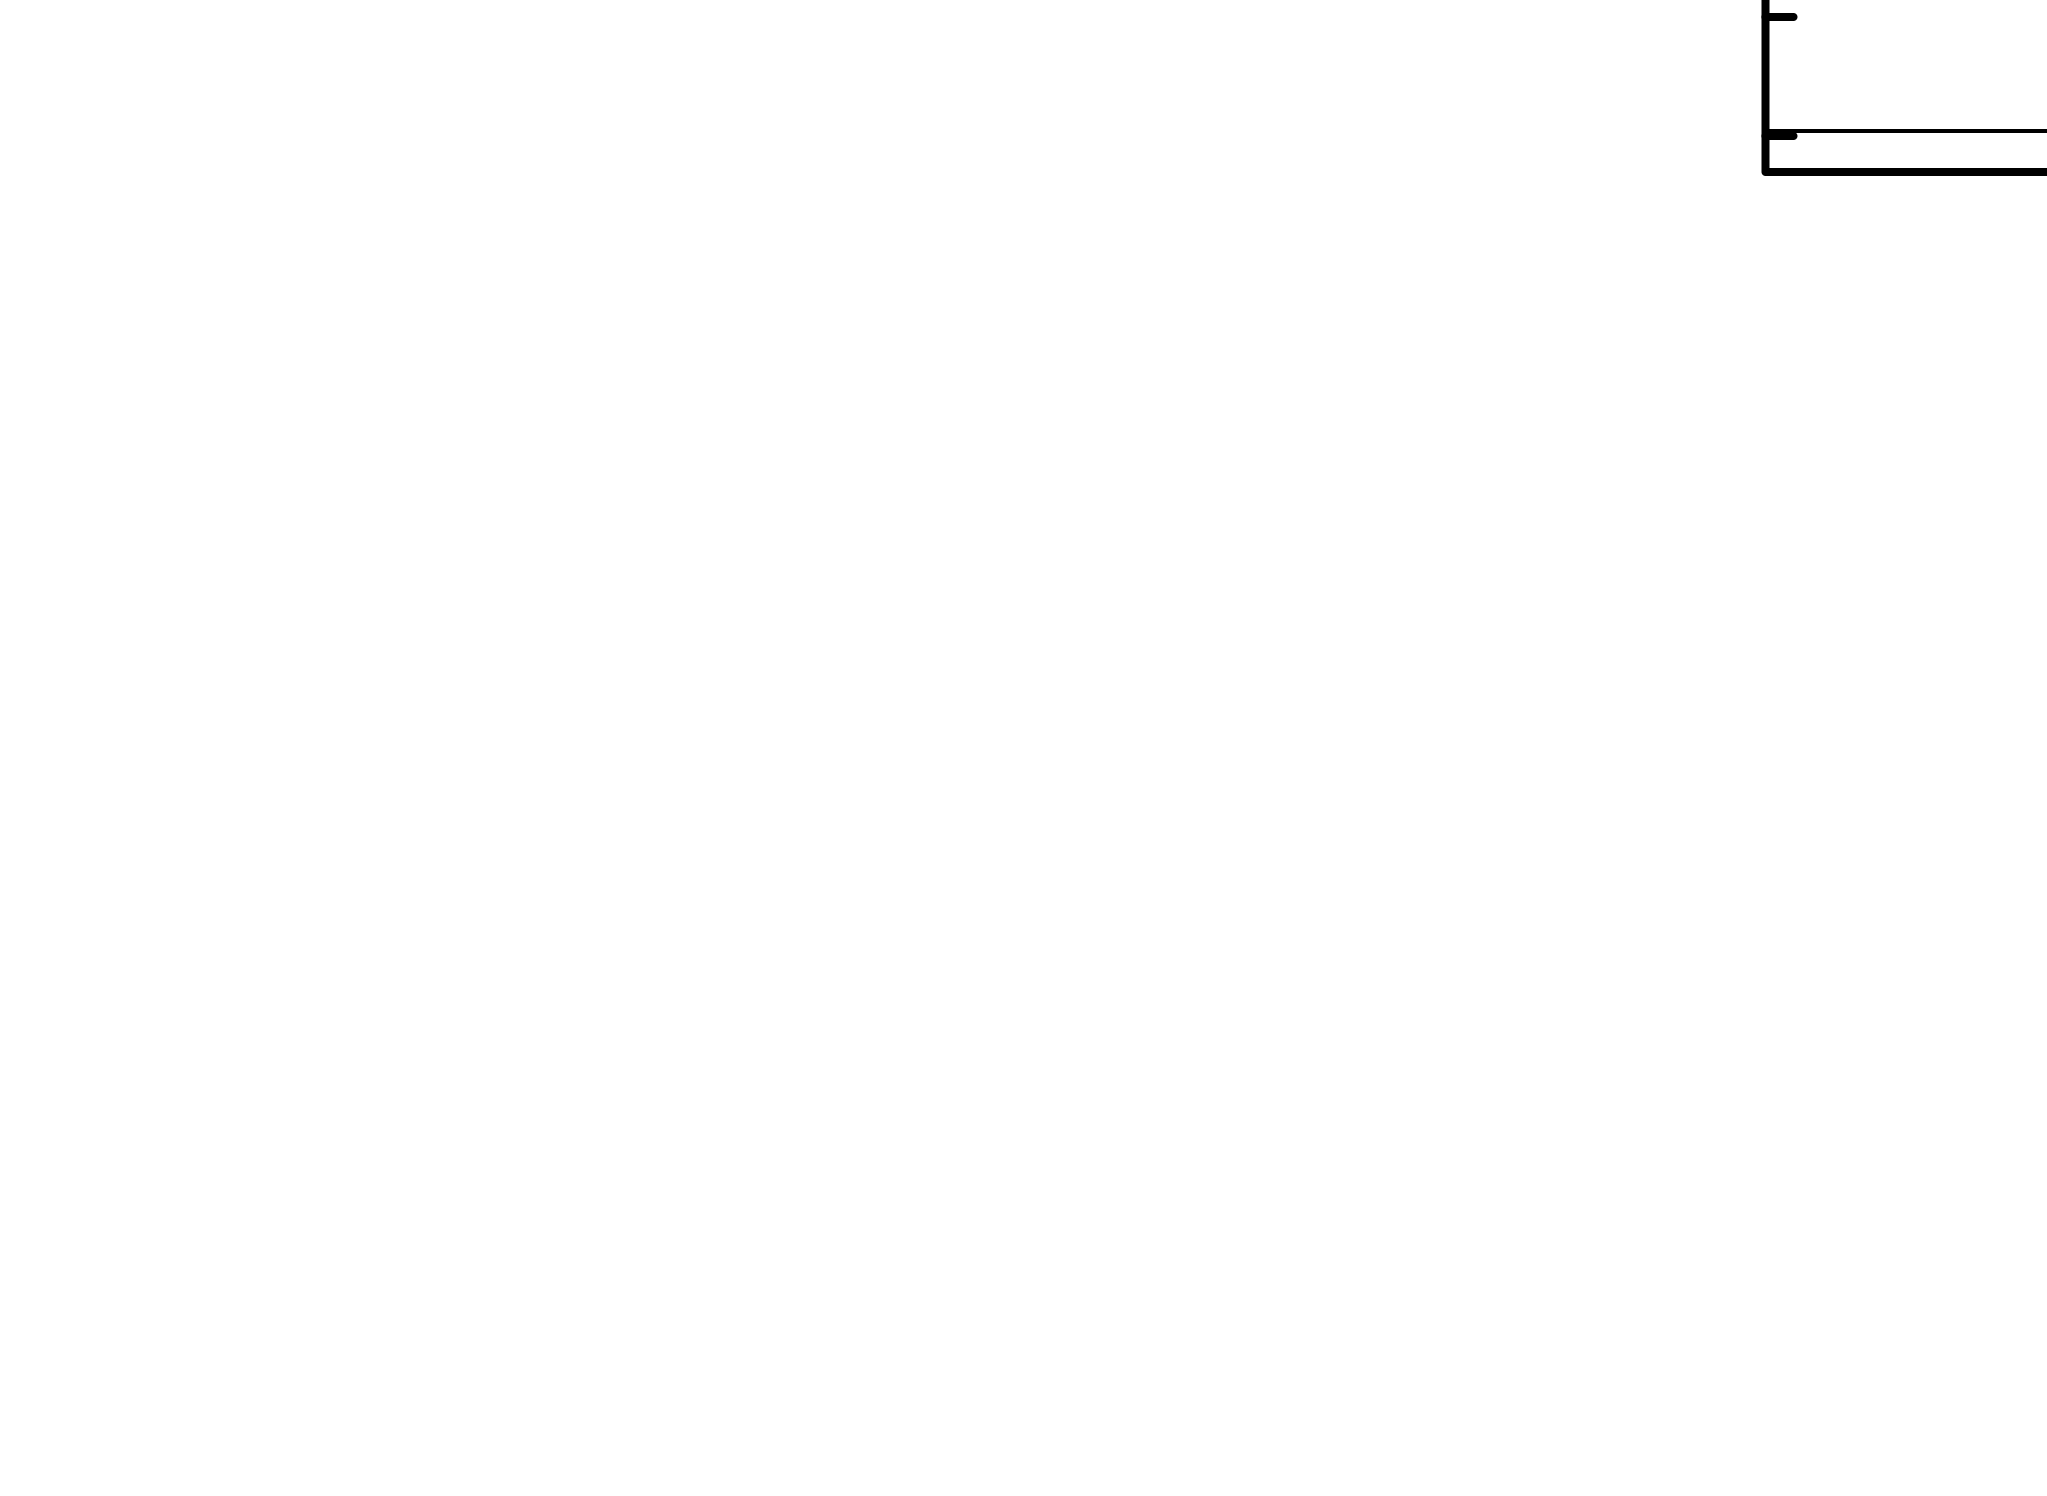

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.479871e+11     using 26 bins.

Test statistic : Chi-Squared              3.479871e+11     using 26 bins.
 Null hypothesis probability of 0.000000e+00 with 23 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
160.694      0.906245     -1      0.489141      0.915668   1.19692e-06
151.932      425761        0     0.0429476       1.60573   1.02354e-06
134.57       1.96466e+06   0    0.00247109       2.03096   1.93465e-0

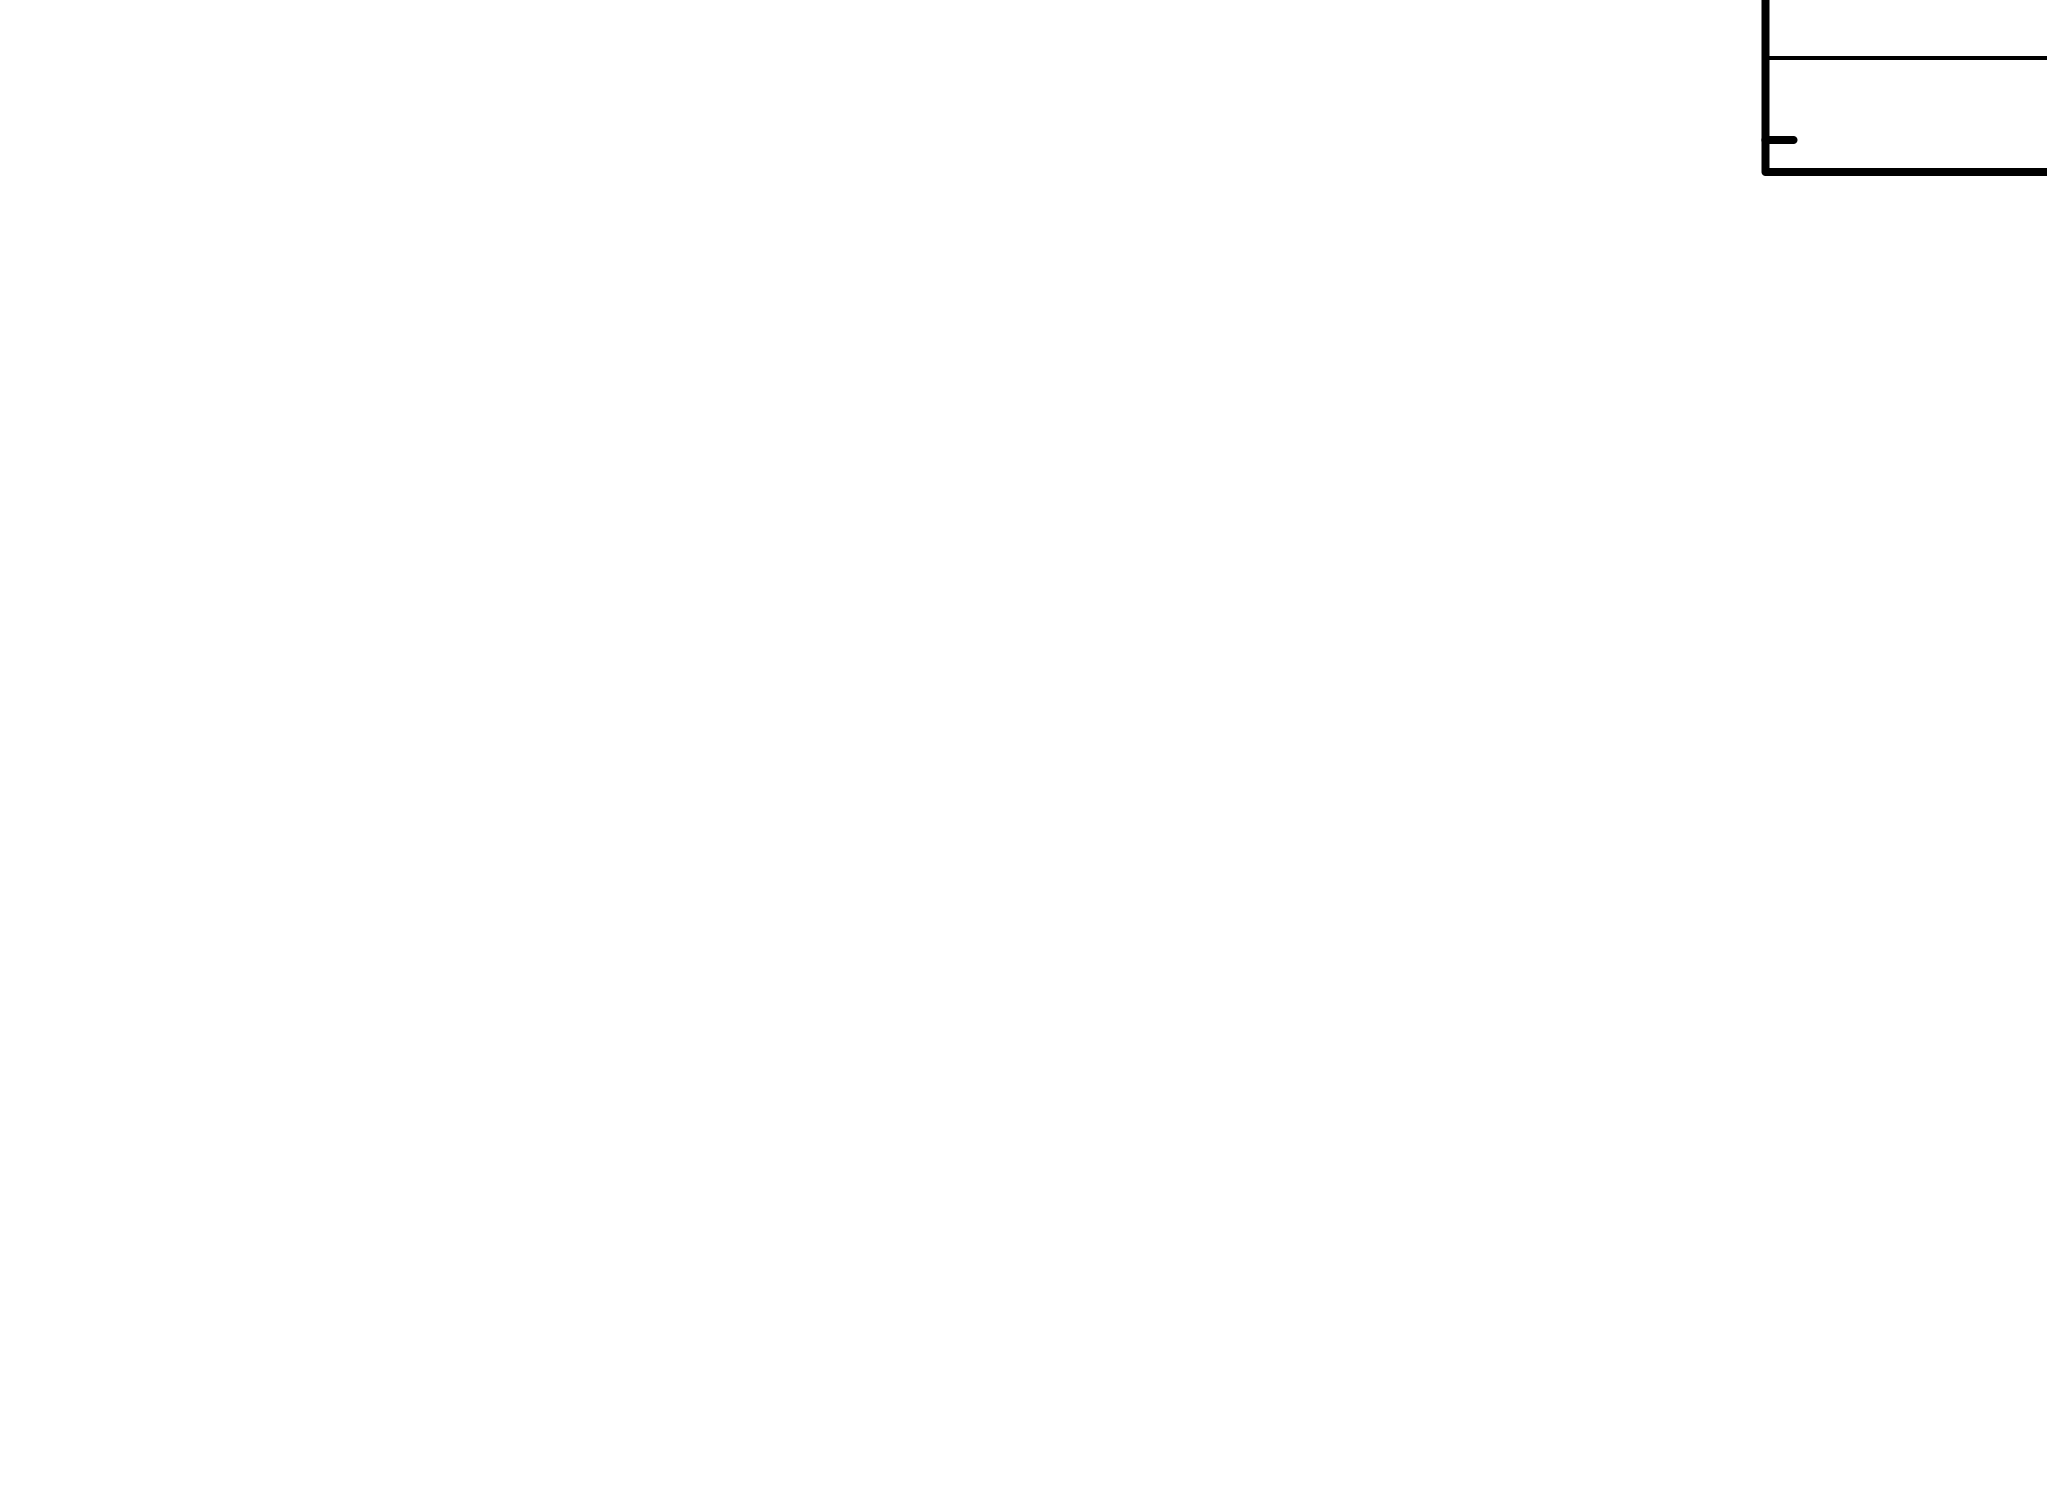

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.396036e+10     using 26 bins.

Test statistic : Chi-Squared              6.396036e+10     using 26 bins.
 Null hypothesis probability of 0.000000e+00 with 23 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
154.953      1.44111      -1      0.333096       17.2147   3.49717e-06
147.138      384343        0      0.109930       5.70898   2.62411e-06
115.001      1.00977e+06  -1     0.0196247      0.641485   1.07498e-05


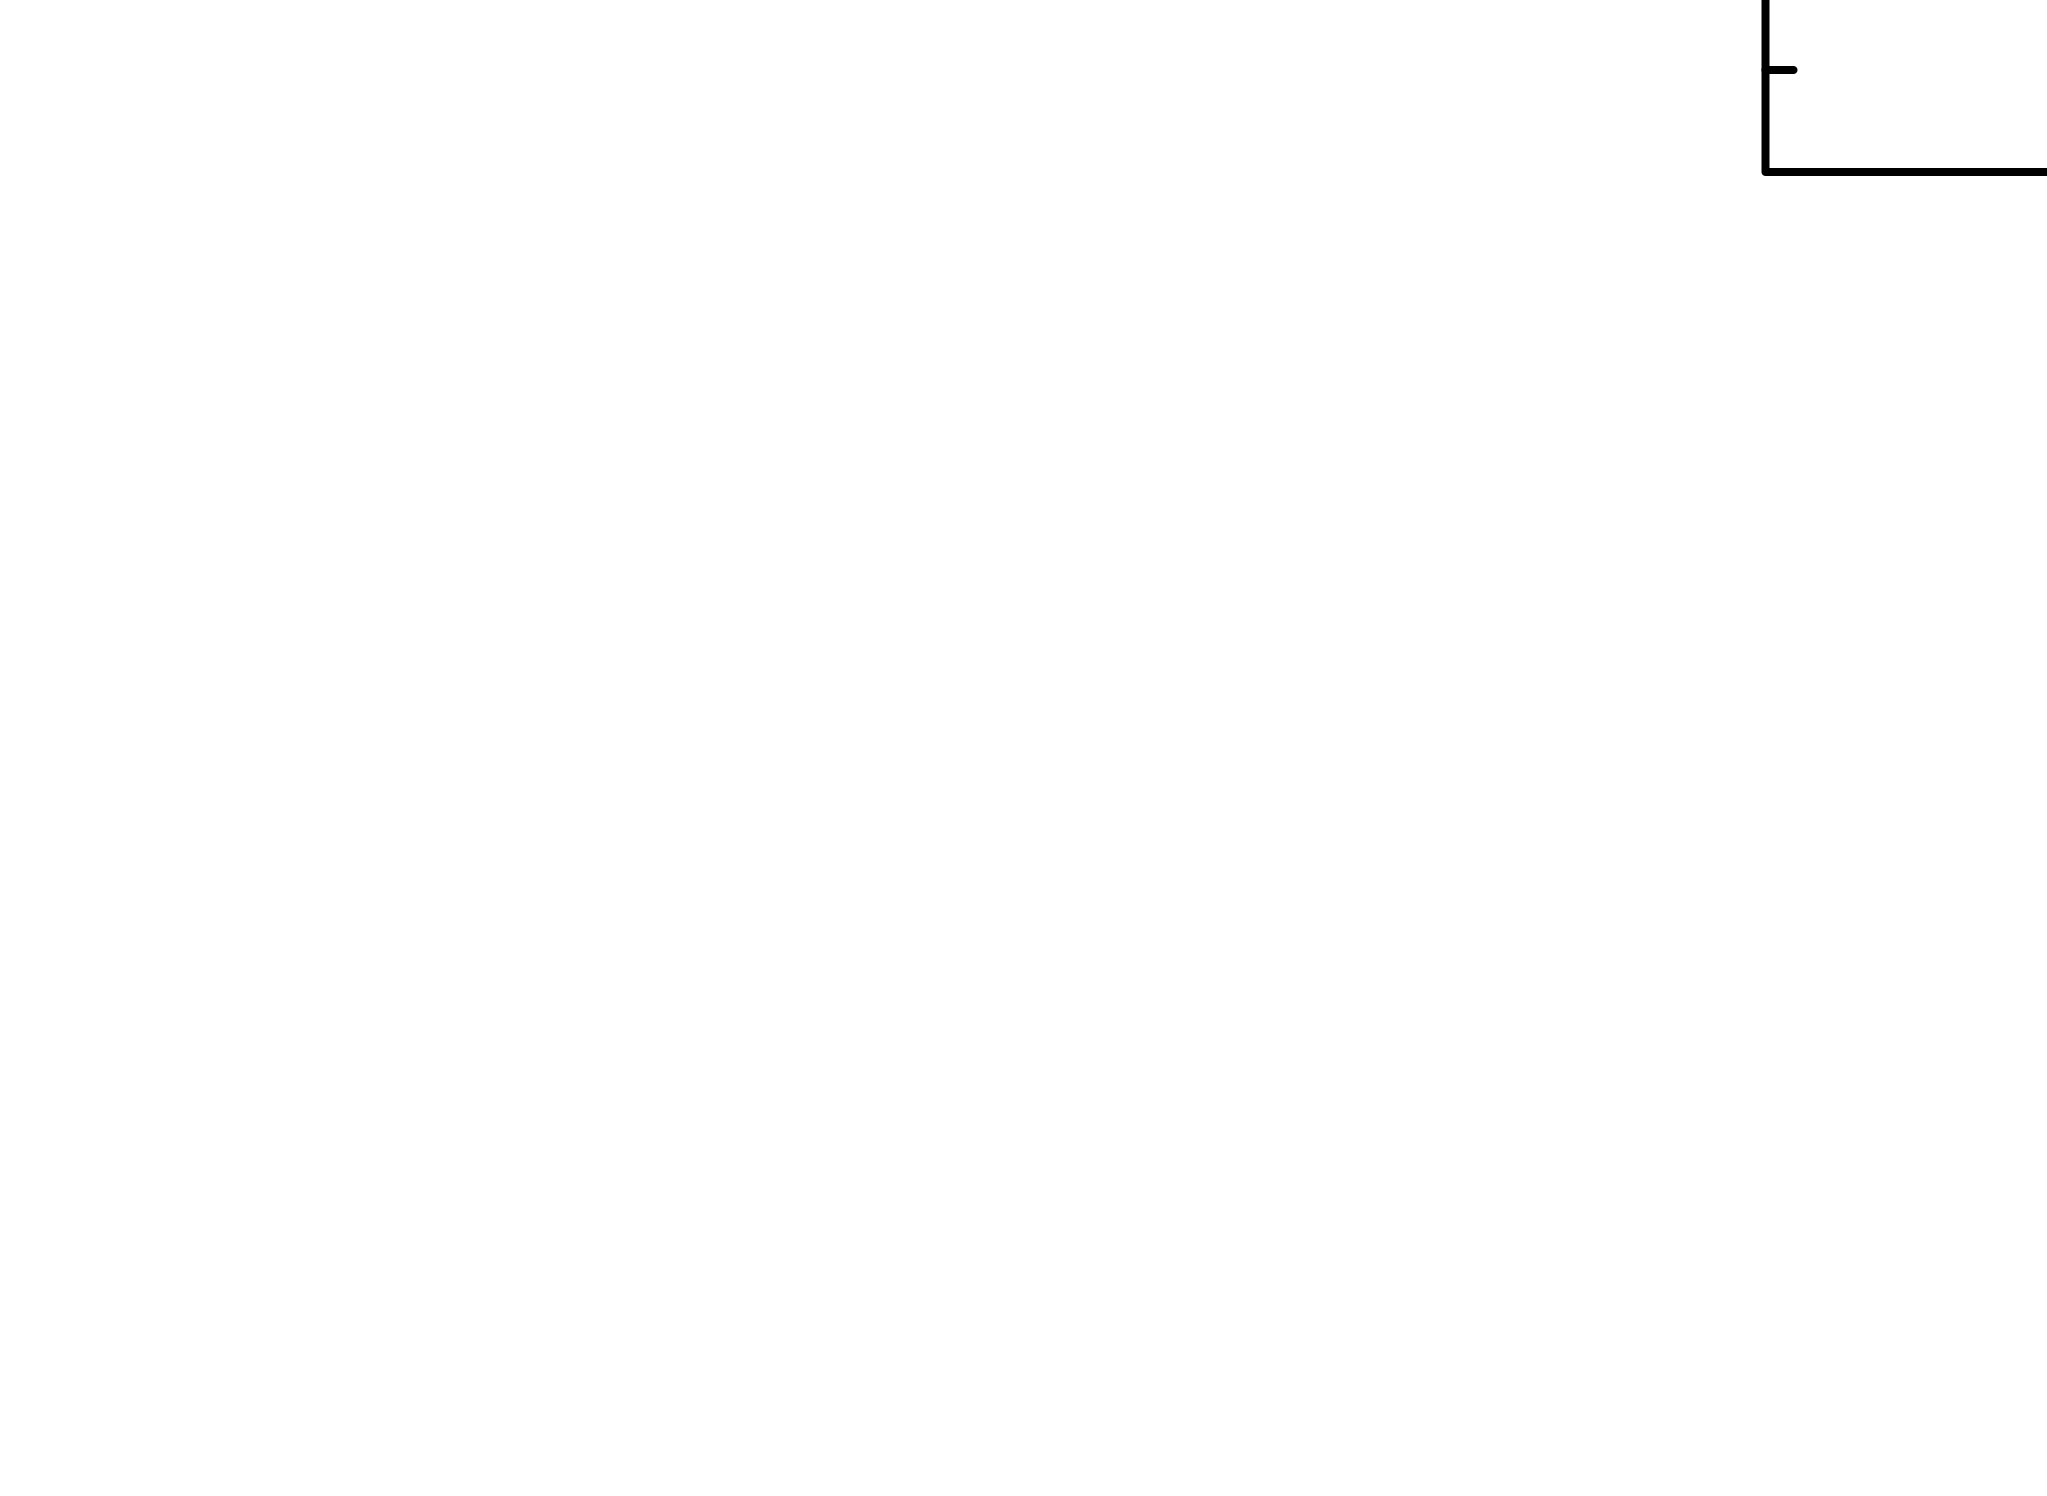

  0.414690
20.0708      18.7828      -3      0.933149      0.120120      0.450377
20.0672      9.97652      -3      0.938151      0.119490      0.476791
20.0659      4.71362      -3      0.941658      0.119051      0.496025
20.0658      2.23047      -4      0.947687      0.118311      0.529005
 Variances and Principal Axes
                 1        2        3  
 2.0773E-06| -0.0613   0.9975   0.0340  
 1.1030E-03|  0.9811   0.0664  -0.1817  
 2.0379E+00| -0.1835   0.0222  -0.9828  
----------------------------------------

  Covariance Matrix
        1           2           3   
   6.969e-02  -8.234e-03   3.673e-01
  -8.234e-03   1.012e-03  -4.449e-02
   3.673e-01  -4.449e-02   1.968e+00
------------------------------------

Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    0.947687     +/-  0.263991     
   2    2   bremss     kT         keV      0.118311     +/-  3.18128E-02  
   3

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.153102e+10     using 26 bins.

Test statistic : Chi-Squared              1.153102e+10     using 26 bins.
 Null hypothesis probability of 0.000000e+00 with 23 degrees of freedom
 Current data and model not fit yet.


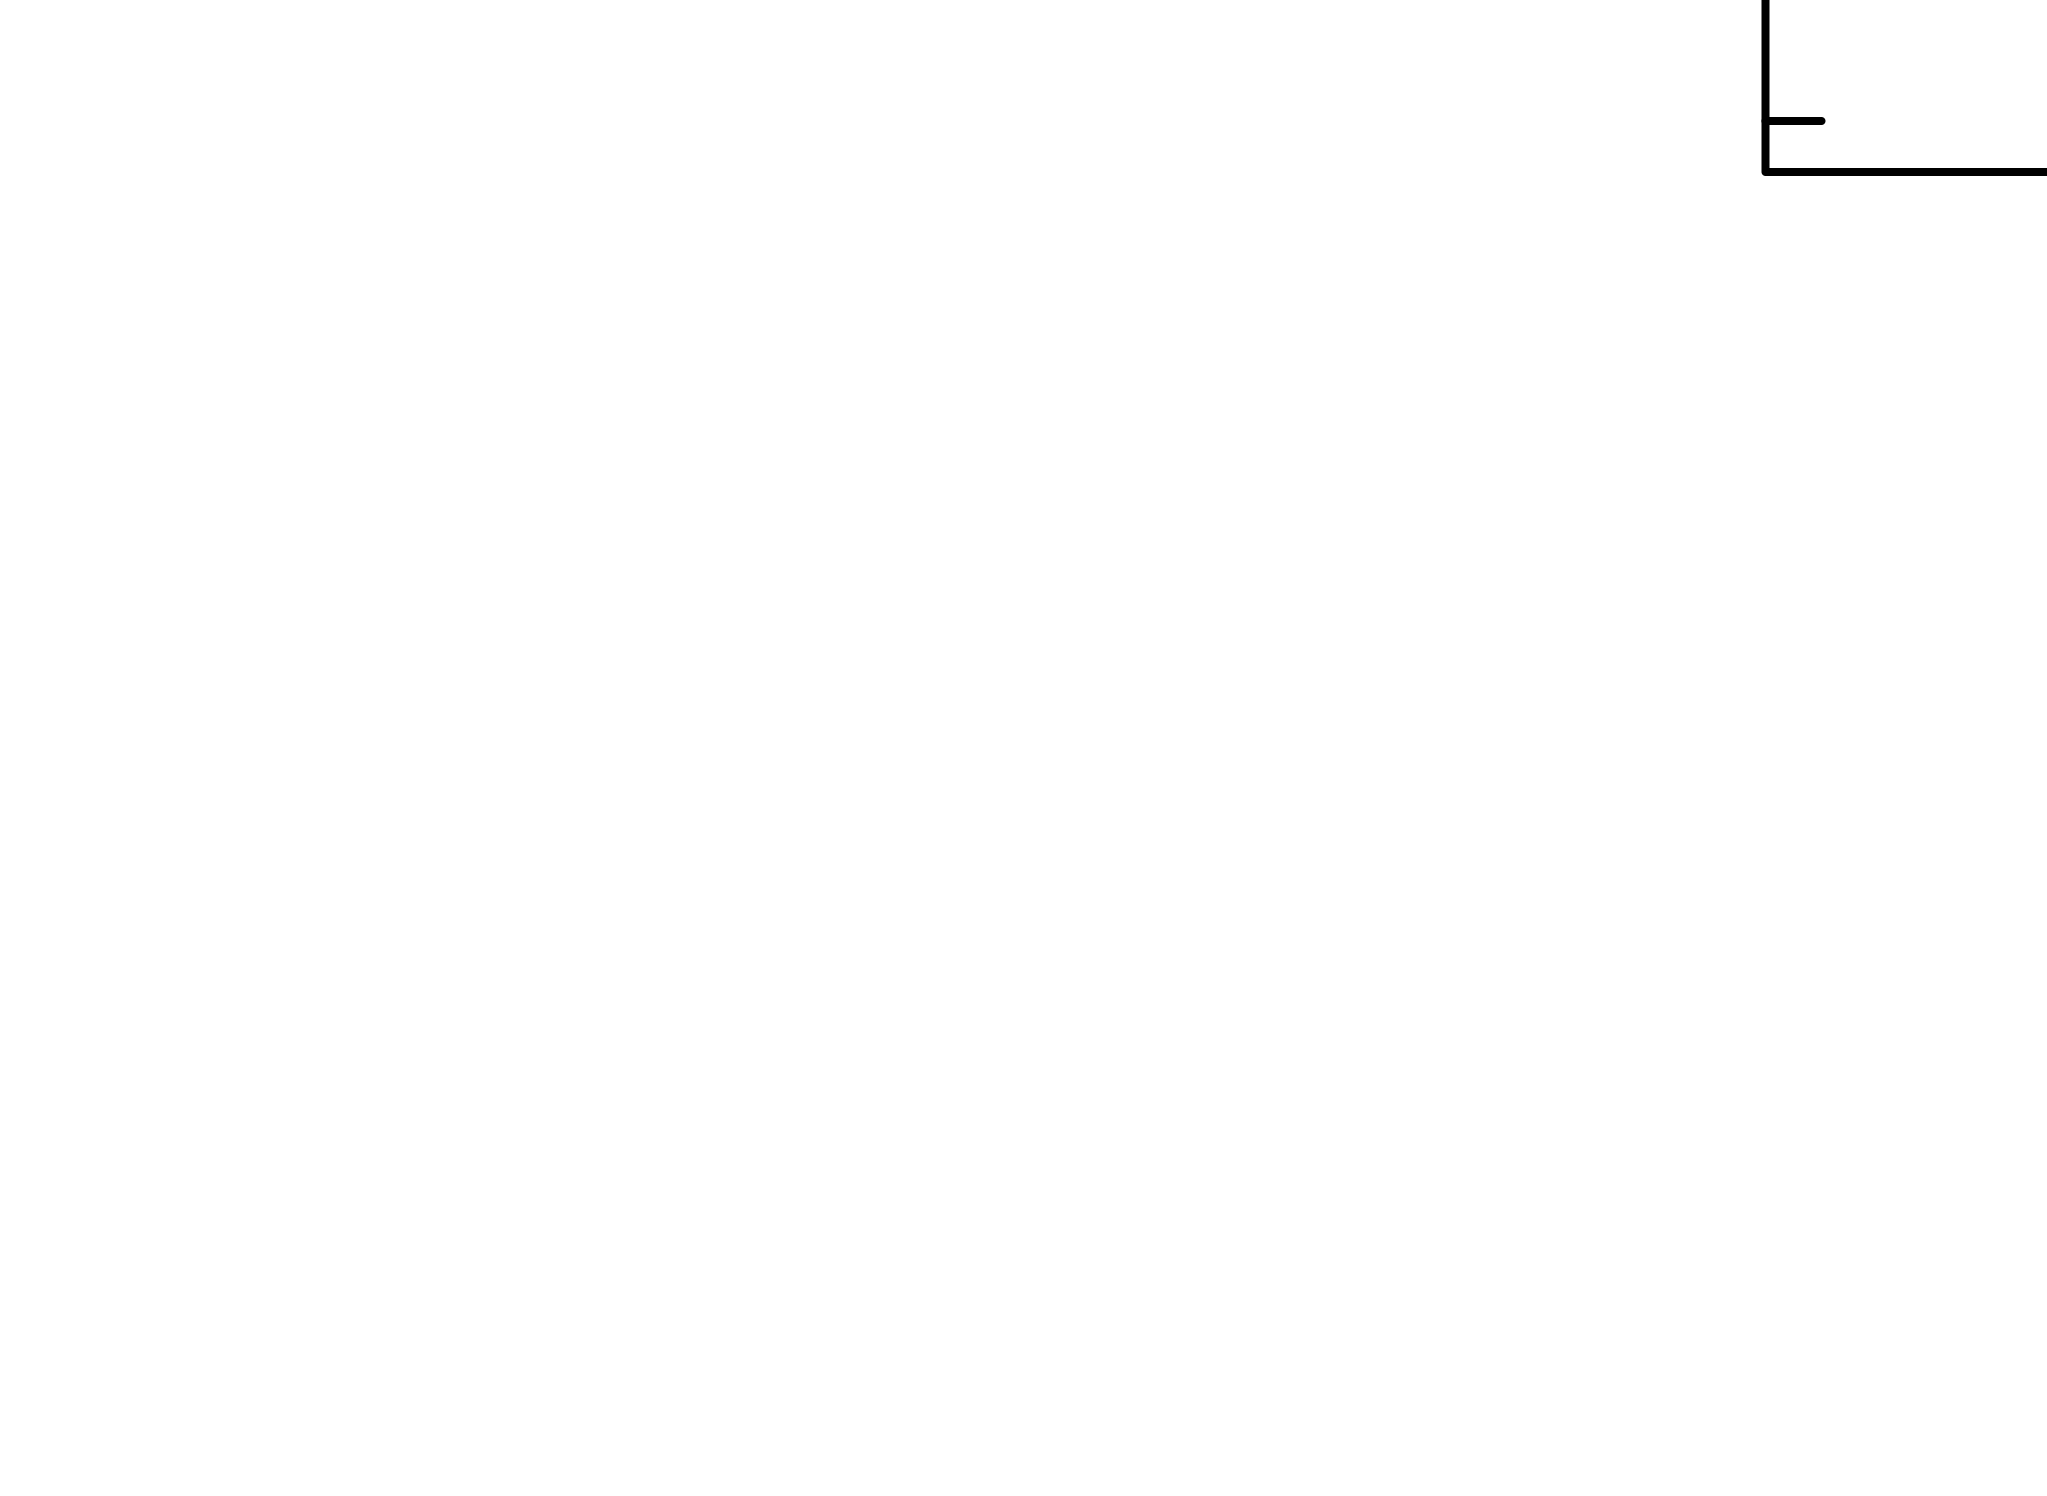

                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
44.3941      15.0808      -3      0.377161      0.359096   4.39346e-05
23.3923      245084       -1      0.320864      0.319879   6.46494e-05
22.5475      10501.2      -1      0.340241      0.306687   7.38083e-05
21.8008      17725.4      -1      0.359104      0.299028   8.36406e-05
21.1369      13950        -1      0.377267      0.292045   9.42527e-05
20.5527      11248.6      -1      0.394649      0.286418   0.000105228
20.0167      9108.44      -1      0.410987      0.280650   0.000117099
19.5481      7830.31      -1      0.426436      0.275852   0.000129329
19.1349      6373.75      -1      0.440978      0.271583   0.000141870
18.7452      5328.82      -1      0.454537      0.266968   0.000155398
18.4029      4788.44      -1      0.467370      0.263074   0.000169199
18.1022      3984.6       -1      0.479480      0.259594   0.000183198
17.8321      3361.92      -1   

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.612678e+10     using 26 bins.

Test statistic : Chi-Squared              4.612678e+10     using 26 bins.
 Null hypothesis probability

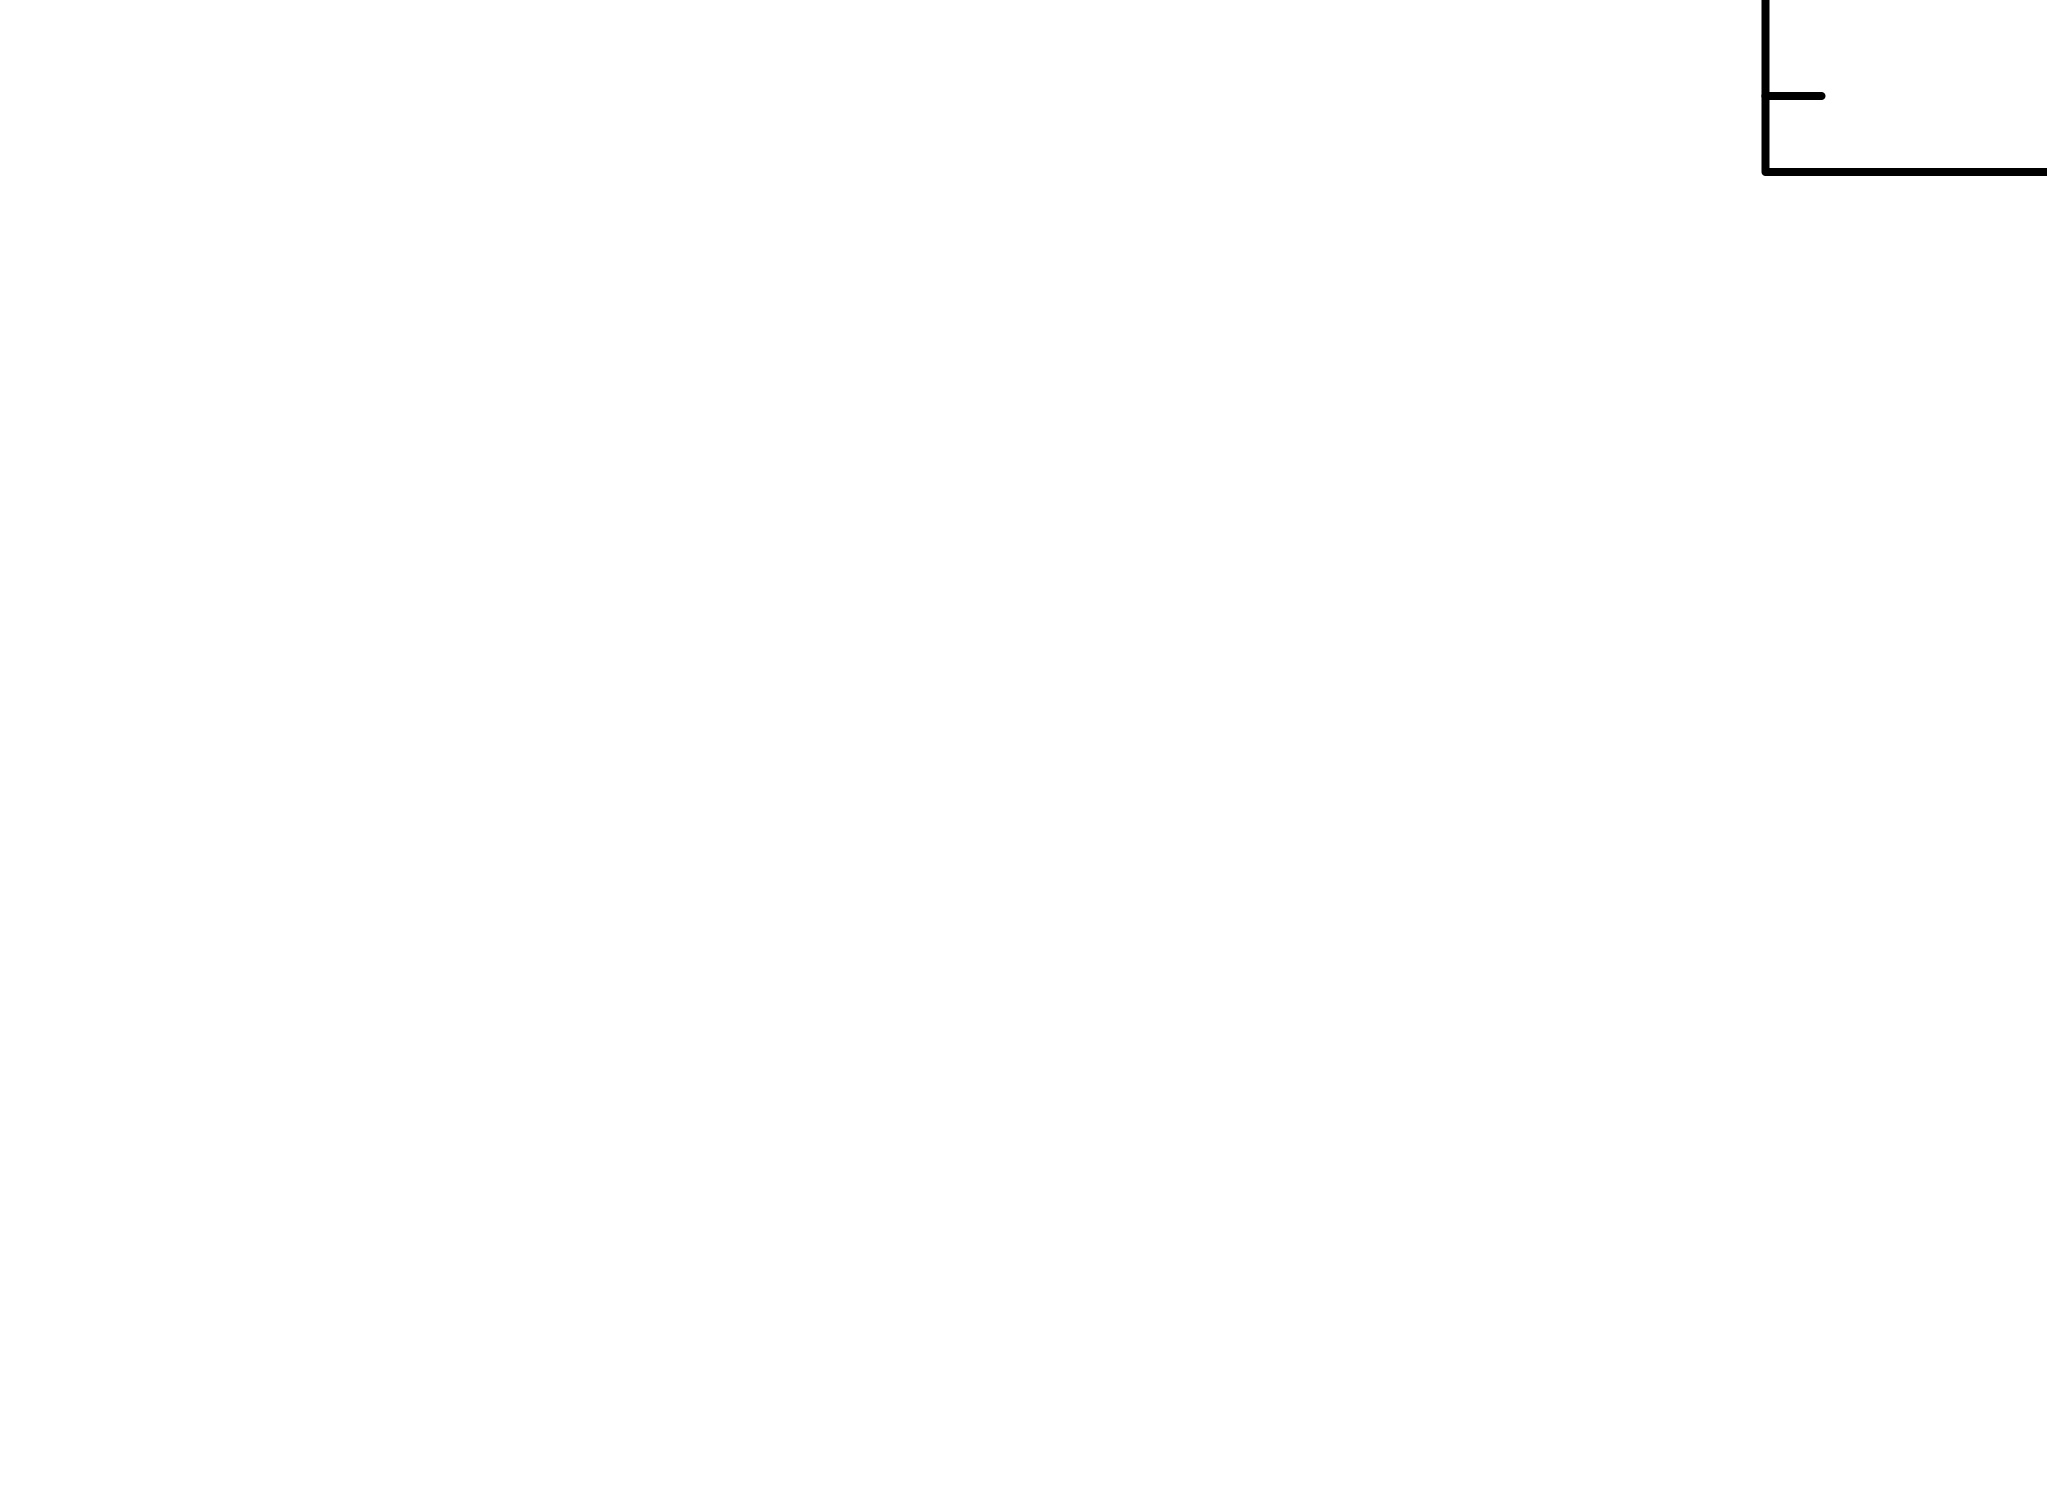

In [7]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 10.0
Fit.perform()
Plot("data resid")

In [8]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.7765e-05 photons (3.8699e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [9]:
plx = 2.7476
d_kpc = 1/plx
F_x = 3.8697*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

6.131288685478704e+29


In [10]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

0.36395399621487845
29.787551764921687


In [11]:
F_opt = 1.05*10**-5 * 10**(-0.4*11.89)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  1.8415745269338484e-10
F_x / F_opt:  -3.677512001594894



Model TBabs<1>(apec<2> + apec<3> + apec<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
  10    4   apec       kT         keV      1.00000      +/-  0.0          
  11    4   apec       Abundanc            1.00000      frozen
  12    4   apec       Redshift            0.0          frozen
  13    4   apec       norm              

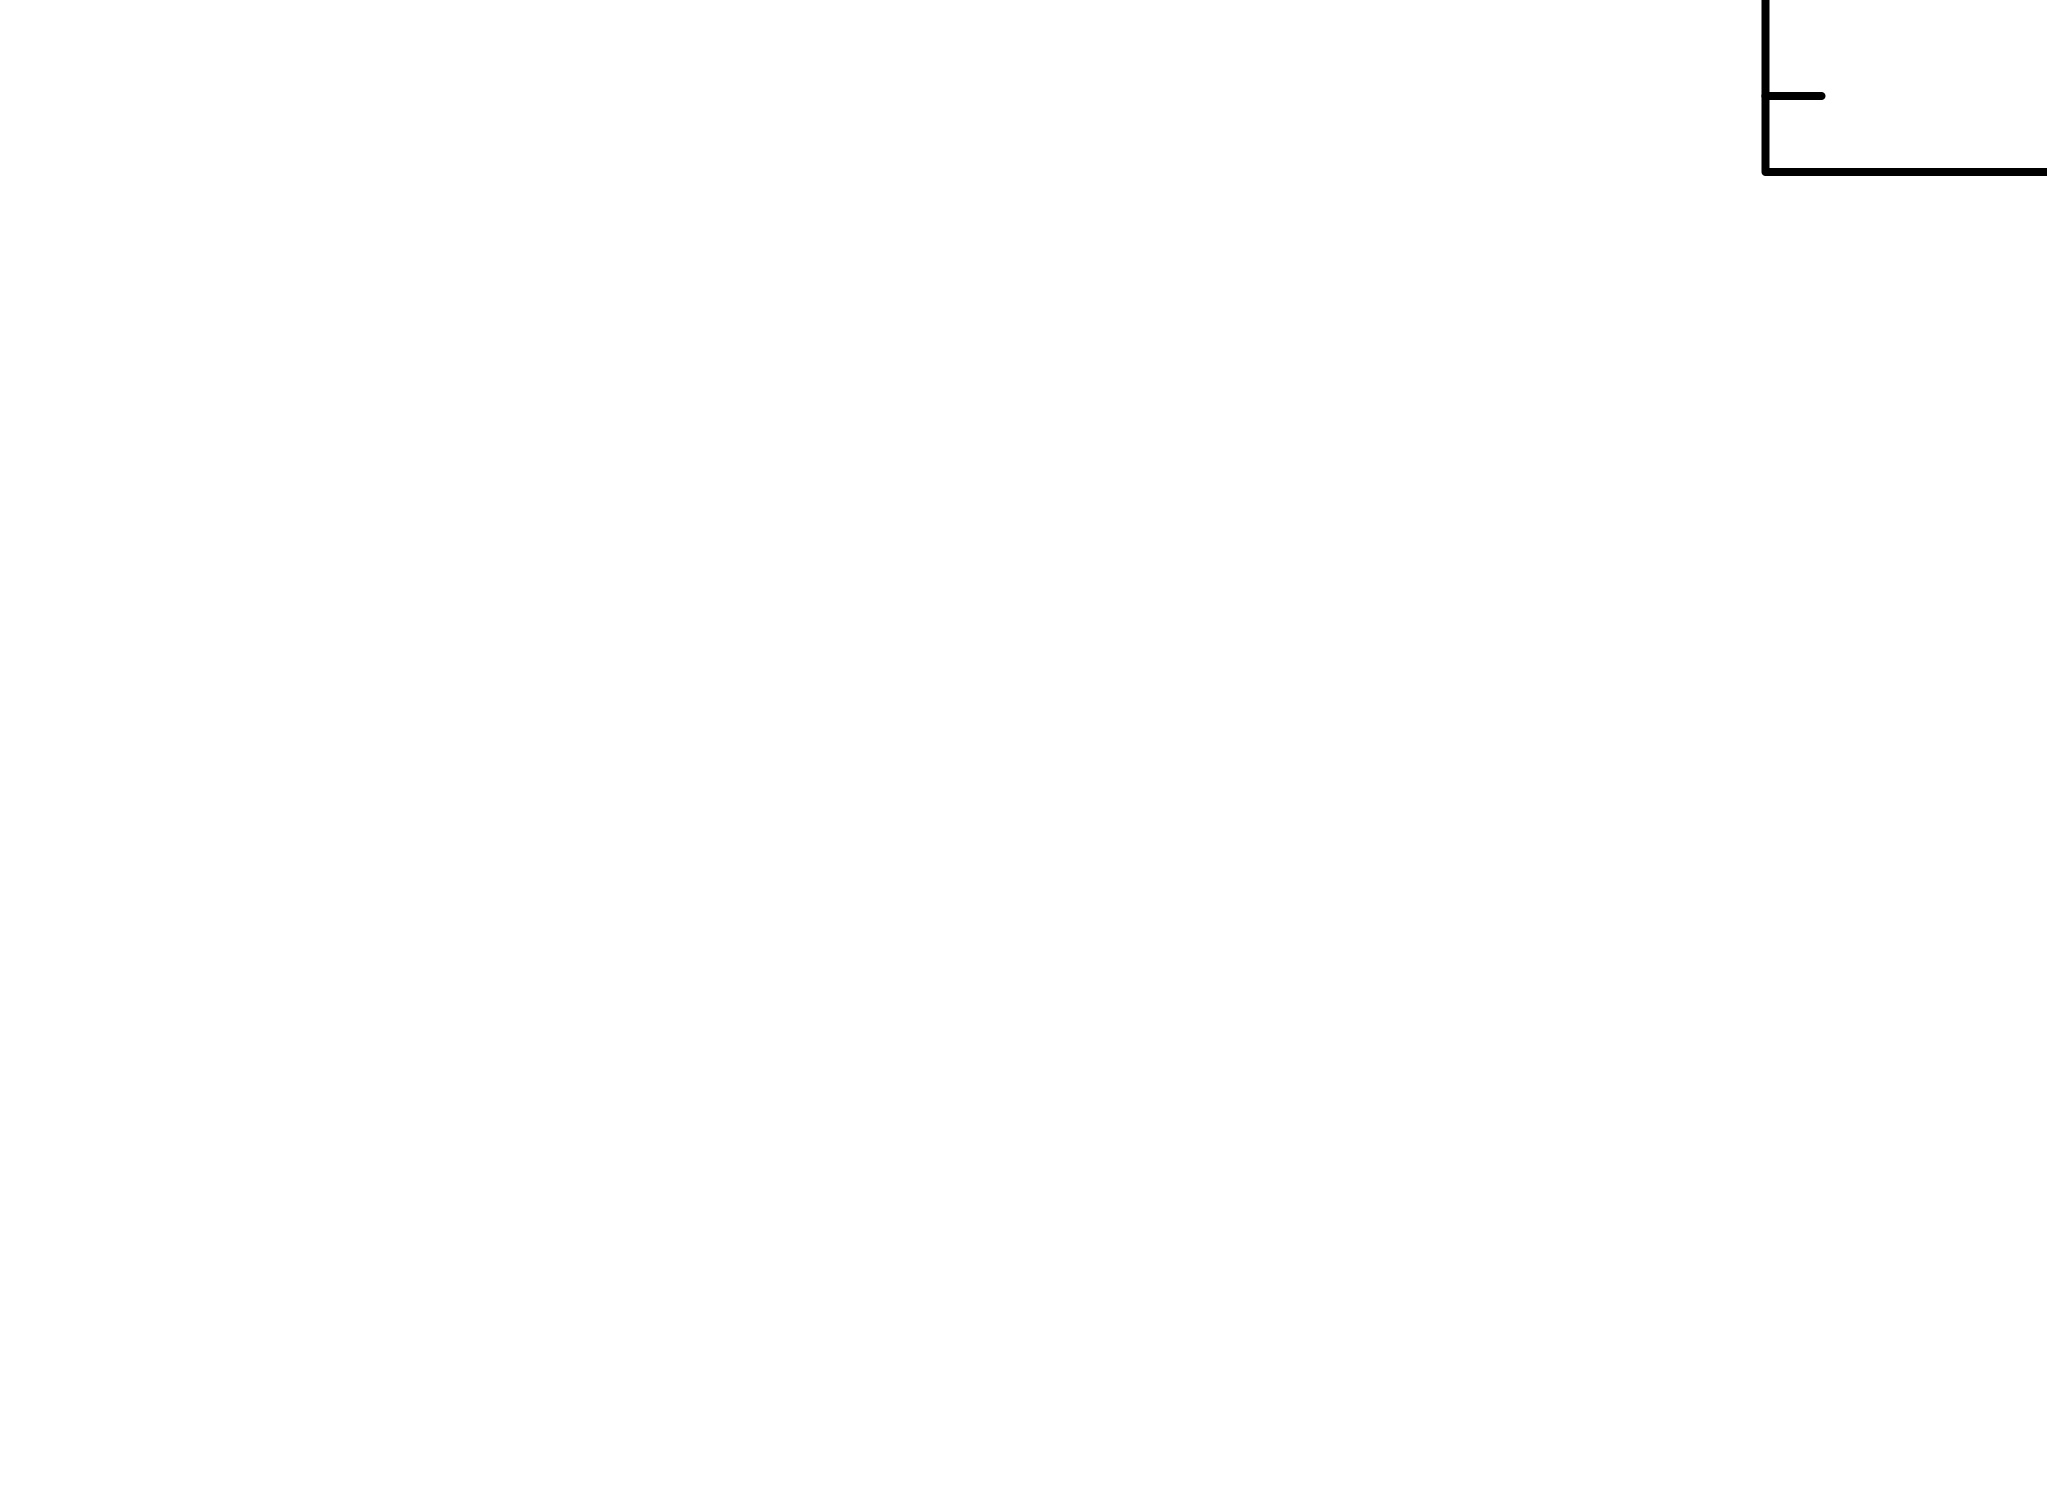

5
13.8625      569.195       0      0.267818      0.206247   4.69128e-05    0.00800017   1.68100e-11      0.753563   1.75913e-05
13.8623      449.56        0      0.267850      0.206233   4.69257e-05    0.00800001   1.68100e-11      0.753581   1.75910e-05
13.8622      359.421       0      0.267881      0.206220   4.69390e-05    0.00800001   1.68100e-11      0.753597   1.75908e-05
13.8621      291.529       0      0.267911      0.206209   4.69528e-05    0.00800000   1.68100e-11      0.753611   1.75909e-05
***Warning: Zero alpha-matrix diagonal element for parameter 6
 Parameter 6 is pegged at 0.008 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
13.8607      288.484       0      0.268291      0.206171   4.70515e-05    0.00800000   1.68100e-11      0.753651   1.75987e-05
13.8495      447.813      -1      0.271408      0.205957   4.82216e-05    0.00800000   1.68100e-11      0.752941   1.77139e-05
13.7966      713.775      -2      0.2927

In [12]:
AllModels.clear()
mo = Model("tbabs*(apec+apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 4.0
mo.apec_4.kT = 10.0
Fit.perform()
Plot("data resid")